# Импорты библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

from os import listdir

from tqdm import tqdm

2025-07-10 19:25:42.854749: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752175543.043765      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752175543.097918      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Представляем данные в датасете

## В датасете есть 5 классов цветов:
### daisy - маргаритки(1)
### dandelion - одуванчики(2)
### rose - розы(3)
### sunflower - подсолнухи(4)
### tulip - тюльпаны(5)



# Определение основных переменных 

In [2]:
MAX_PIXELS_WIDTH = 126 # ширина картинки
MAX_PIXELS_HEIGHT = 126 # высота картинки
BATCH_SIZE = 50 # размер батча
X = [] # представление изображения в виде массива
Z = [] # лэйблы изображений

# переменные для обработки изображений
INITIAL_FLOWER_DIR = "../input/flowers-recognition/flowers"
FLOWER_DAISY_DIR='../input/flowers-recognition/flowers/daisy'
FLOWER_SUNFLOWER_DIR='../input/flowers-recognition/flowers/sunflower'
FLOWER_TULIP_DIR='../input/flowers-recognition/flowers/tulip'
FLOWER_DANDI_DIR='../input/flowers-recognition/flowers/dandelion'
FLOWER_ROSE_DIR='../input/flowers-recognition/flowers/rose'



flowers_dirs = [FLOWER_DAISY_DIR, FLOWER_SUNFLOWER_DIR, FLOWER_TULIP_DIR, FLOWER_DANDI_DIR, FLOWER_ROSE_DIR]
flowers_label = ["daisy", "sunflower","tulip", "dandelion", "rose"]

print()

# Подготавливаем данные

In [3]:
def make_train_data(flower_type,DIR): ## ресайзит изображения в папке до значений переданных в переменную
    for img in tqdm(os.listdir(DIR)):
        label=flower_type
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (MAX_PIXELS_WIDTH,MAX_PIXELS_HEIGHT))
       
        
        X.append(np.array(img))
        Z.append(str(label))


for i in range(5):
    make_train_data(flowers_label[i], flowers_dirs[i])

print(F"Length of X array len(X)")

100%|██████████| 784/784 [00:07<00:00, 102.35it/s]

Length of X array len(X)


In [4]:
from sklearn.model_selection import train_test_split
# Лэйбл энкодер переводит метки в цифр
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

# Создаем модель

In [5]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (MAX_PIXELS_WIDTH,MAX_PIXELS_HEIGHT,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
# model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Flatten())
model.add(Dense(256))
model.add(Dropout(0.5))
model.add(Activation('relu'))
model.add(Dense(5, activation = "softmax"))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1752175598.655218      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752175598.655810      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │           2,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 31, 31, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 31, 31, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 15, 15, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 15, 15, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,605,888 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │           1,285 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,850,053 (7.06 MB)

 Trainable params: 1,849,797 (7.06 MB)

 Non-trainable params: 256 (1.00 KB)

In [7]:
optimizer = Adam(learning_rate=0.001)

In [8]:
model.compile(optimizer=optimizer, loss=CategoricalCrossentropy(), metrics=['accuracy'])

In [9]:
history = model.fit(x_train,y_train,epochs=10,batch_size=BATCH_SIZE,validation_data = (x_test,y_test))

Epoch 1/10


I0000 00:00:1752175605.069442      98 service.cc:148] XLA service 0x3a35d280 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1752175605.070157      98 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1752175605.070179      98 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1752175605.452979      98 cuda_dnn.cc:529] Loaded cuDNN version 90300


 3/70 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.1644 - loss: 6.7874 

I0000 00:00:1752175610.890137      98 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


70/70 ━━━━━━━━━━━━━━━━━━━━ 17s 115ms/step - accuracy: 0.2365 - loss: 3.1502 - val_accuracy: 0.3495 - val_loss: 1.5969
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.3441 - loss: 1.5348 - val_accuracy: 0.3866 - val_loss: 1.5542
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4019 - loss: 1.4532 - val_accuracy: 0.4699 - val_loss: 1.4863
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4178 - loss: 1.3752 - val_accuracy: 0.4780 - val_loss: 1.2966
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4732 - loss: 1.2478 - val_accuracy: 0.4398 - val_loss: 1.3264
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.4550 - loss: 1.2922 - val_accuracy: 0.4410 - val_loss: 1.2921
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5370 - loss: 1.1518 - val_accuracy: 0.5139 - val_loss: 1.1893
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5476 - loss: 1.1054 - val_accuracy: 0.4630 - val_loss: 

# Создаем график accuracy

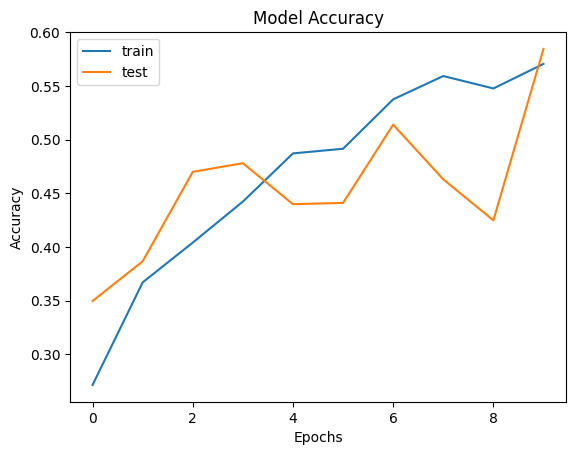

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

### Максимум данной модели 70 процентов accuracy

## Замечен underfitting, попробуем добавить ImageDataGenerator(аугментация изображений)


In [11]:
datagen = ImageDataGenerator(
        # featurewise_center=False,  # set input mean to 0 over the dataset
        # samplewise_center=False,  # set each sample mean to 0
        # featurewise_std_normalization=False,  # divide inputs by std of the dataset
        # samplewise_std_normalization=False,  # divide each input by its std
        # zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.4,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.4,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
## суть в генерации новых изображений

datagen.fit(x_train)

In [12]:
History = model.fit(datagen.flow(x_train,y_train, batch_size=BATCH_SIZE),
                               epochs = 20, validation_data = (x_test,y_test),
                             )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 20s 226ms/step - accuracy: 0.5152 - loss: 1.2094 - val_accuracy: 0.4491 - val_loss: 1.5423
Epoch 2/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 173ms/step - accuracy: 0.5325 - loss: 1.1622 - val_accuracy: 0.5660 - val_loss: 1.2418
Epoch 3/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 175ms/step - accuracy: 0.5465 - loss: 1.1599 - val_accuracy: 0.6157 - val_loss: 0.9291
Epoch 4/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 176ms/step - accuracy: 0.5465 - loss: 1.1106 - val_accuracy: 0.6285 - val_loss: 1.0002
Epoch 5/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 175ms/step - accuracy: 0.5525 - loss: 1.1034 - val_accuracy: 0.5579 - val_loss: 1.1491
Epoch 6/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 179ms/step - accuracy: 0.5566 - loss: 1.0935 - val_accuracy: 0.5278 - val_loss: 1.1638
Epoch 7/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 173ms/step - accuracy: 0.5768 - loss: 1.0939 - val_accuracy: 0.6400 - val_loss: 0.9520
Epoch 8/20
70/70 ━━━━━━━━━━━━━━━━━━━━ 12s 173ms/step - accuracy: 0.5641 - loss: 1.0430 - val_accu

# Строим второй график

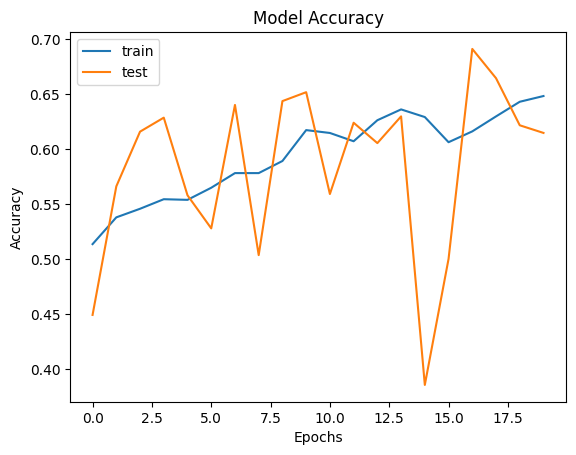

In [13]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

### На данный момент получилось добиться максимум до 75 процентов accuracy

# Попробуем тренированные модели, а именно VGG16

In [14]:
X = []
Z = []
def make_train_data(flower_type,DIR): ## ресайзит изображения в папке до значений переданных в переменную
    for img in tqdm(os.listdir(DIR)):
        label=flower_type
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (MAX_PIXELS_WIDTH, MAX_PIXELS_HEIGHT))
       
        
        X.append(np.array(img))
        Z.append(str(label))


for i in range(5):
    make_train_data(flowers_label[i], flowers_dirs[i])

print(F"Length of X array len(X)")


from sklearn.model_selection import train_test_split
# Лэйбл энкодер переводит метки в цифр
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

100%|██████████| 784/784 [00:01<00:00, 453.24it/s]


Length of X array len(X)


In [15]:


from keras.applications.vgg16 import VGG16
import keras
vgg16_layer = VGG16(include_top = False, pooling='avg', weights='imagenet')
import tensorflow as tf
print(tf.executing_eagerly())
tf.compat.v1.enable_eager_execution()
model2 = Sequential()
model2.add(vgg16_layer)
model2.add(Flatten())
model2.add(BatchNormalization())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.45))
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(5, activation='softmax'))

model2.layers[0].trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
True


In [16]:
model2.compile(optimizer=optimizer, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 512)                 │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 5)                   │           2,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,683,857 (71.27 MB)

 Trainable params: 267,525 (1.02 MB)

 Non-trainable params: 14,716,736 (56.14 MB)

 Optimizer params: 3,699,596 (14.11 MB)

In [17]:
import tensorflow as tf
print(tf.executing_eagerly())
tf.compat.v1.enable_eager_execution()
datagen = ImageDataGenerator(
        # featurewise_center=False,  # set input mean to 0 over the dataset
        # samplewise_center=False,  # set each sample mean to 0
        # featurewise_std_normalization=False,  # divide inputs by std of the dataset
        # samplewise_std_normalization=False,  # divide each input by its std
        # zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images
## суть в генерации новых изображений

datagen.fit(x_train)

train_generator = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

import tensorflow as tf
tf.config.run_functions_eagerly(True)
model2.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


True


In [18]:
history_of_vgg16 = model2.fit(train_generator, epochs=10, validation_data=(x_test, y_test))
import joblib
joblib.dump(model2, "model.pkl")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


70/70 ━━━━━━━━━━━━━━━━━━━━ 34s 378ms/step - accuracy: 0.4864 - loss: 1.4394 - val_accuracy: 0.5671 - val_loss: 1.2233
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 340ms/step - accuracy: 0.6969 - loss: 0.8380 - val_accuracy: 0.6806 - val_loss: 0.9723
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 24s 344ms/step - accuracy: 0.7143 - loss: 0.7963 - val_accuracy: 0.7558 - val_loss: 0.7629
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 350ms/step - accuracy: 0.7566 - loss: 0.6630 - val_accuracy: 0.7488 - val_loss: 0.6931
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 354ms/step - accuracy: 0.7574 - loss: 0.6542 - val_accuracy: 0.7708 - val_loss: 0.6267
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 356ms/step - accuracy: 0.7731 - loss: 0.6125 - val_accuracy: 0.7789 - val_loss: 0.6108
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 358ms/step - accuracy: 0.7733 - loss: 0.5971 - val_accuracy: 0.7894 - val_loss: 0.6050
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 25s 360ms/step - accuracy: 0.7685 - loss: 0.6020 - val_accuracy: 0.788

['model.pkl']

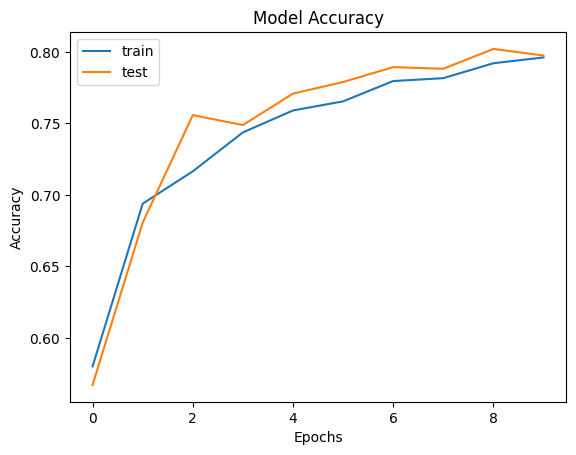

In [20]:
plt.plot(history_of_vgg16.history['accuracy'])
plt.plot(history_of_vgg16.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

### Считаю эту модель наиболее успешной, поскольку метрики тренировки и валидации точности идут практически вровень, исключением является 1 эпоха, где наблюдается непропорциональный рост

## Выход из модели представлен вложенным массивом, с 5 элементами нулями

### Как только распознается цветок, ноль заменяется единичкой на месте элемента

# Итоги работы
### Мною получилось построить 3 модели с разными типами,могу сказать, что самой лучшей оказалась претренированная модель VGG16 с точностью в 80 процентов, в отличие от мною собранных нейронных сетей
### В отличие от предыдущих моделей метрики растут пропорционально, получая в финале хорошую точность, в предыдущих моделях наблюдается рост с резкими спадами точности валидации(думаю, что связано с перетренированностью), решил оставить так как есть в погоне за относительно неплохой точностью, без добавления Dropout и батч нормализации происходит перетренировка модели, что выливается в малую валидационную точность, пришлось использовать способы противодействия оверфиттингу, жертвуя относительно стабильным графиком и точностью